In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps

In [ ]:
import requests
import json

In [2]:
base = pd.read_csv("../Project_1/500_Cities__Obesity_among_adults_aged___18_years.csv")
base.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003004600,Obesity among adults aged >=18 Years,%,...,18.0,NaN,NaN,"3,735","(21.3510749539, -157.825340793)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003001400,Obesity among adults aged >=18 Years,%,...,19.7,NaN,NaN,"2,550","(21.2772209725, -157.806213514)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
2,2017,GA,Georgia,Roswell,City,BRFSS,Unhealthy Behaviors,1367284,Obesity among adults aged >=18 Years,%,...,23.9,NaN,NaN,"88,346","(34.0391384583, -84.3512225277)",UNHBEH,OBESITY,1367284.0,NaN,Obesity
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003010801,Obesity among adults aged >=18 Years,%,...,25.0,NaN,NaN,"2,969","(21.4491051468, -157.761542724)",UNHBEH,OBESITY,15003.0,1.500301e+10,Obesity
4,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011425,Obesity among adults aged >=18 Years,%,...,21.9,NaN,NaN,"6,906","(34.013011213, -84.2405514785)",UNHBEH,OBESITY,1342425.0,1.312101e+10,Obesity


In [3]:
print(len(base["CityName"].unique()))

475


In [15]:
base.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003004600,Obesity among adults aged >=18 Years,%,...,18.0,NaN,NaN,"3,735","(21.3510749539, -157.825340793)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003001400,Obesity among adults aged >=18 Years,%,...,19.7,NaN,NaN,"2,550","(21.2772209725, -157.806213514)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
2,2017,GA,Georgia,Roswell,City,BRFSS,Unhealthy Behaviors,1367284,Obesity among adults aged >=18 Years,%,...,23.9,NaN,NaN,"88,346","(34.0391384583, -84.3512225277)",UNHBEH,OBESITY,1367284.0,NaN,Obesity
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003010801,Obesity among adults aged >=18 Years,%,...,25.0,NaN,NaN,"2,969","(21.4491051468, -157.761542724)",UNHBEH,OBESITY,15003.0,1.500301e+10,Obesity
4,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011425,Obesity among adults aged >=18 Years,%,...,21.9,NaN,NaN,"6,906","(34.013011213, -84.2405514785)",UNHBEH,OBESITY,1342425.0,1.312101e+10,Obesity


In [4]:
group= base.groupby(["StateDesc","CityName"])
meanvalue = group["Data_Value"].mean()

In [5]:
maxvalue = meanvalue.max()
meanvalue = pd.DataFrame(meanvalue).reset_index()

In [6]:
meanvalue.loc[(meanvalue["Data_Value"]==maxvalue)]

,StateDesc,CityName,Data_Value
240,Indiana,Gary,50.042424


In [7]:
meanvalue

,StateDesc,CityName,Data_Value
0,Alabama,Birmingham,40.329348
1,Alabama,Hoover,29.160000
2,Alabama,Huntsville,35.896667
3,Alabama,Mobile,38.803896
4,Alabama,Montgomery,39.204839
...,...,...,...
495,Wisconsin,Madison,26.304478
496,Wisconsin,Milwaukee,35.874299
497,Wisconsin,Racine,39.504167
498,Wisconsin,Waukesha,30.763636


In [8]:
USDA = pd.read_csv('../data/USDA_Farmers_Market.csv')
USDA.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/17 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/14 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/12 10:38


In [59]:
merged_df = USDA.merge(meanvalue, how = 'left', on = ['CityName', 'StateDesc'])
merged_df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43,NaN
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,Y,N,N,N,N,N,N,6/21/17 17:15,29.037500
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,Y,N,N,N,N,N,N,10/28/14 9:49,NaN
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/12 10:38,25.034450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,1004767,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,...,Y,Y,N,N,N,N,N,N,6/5/14 14:40,NaN
8812,1018362,Zimmerman Farmers' Market,http://Pzfarmersmarket.org,Princeton-zimmerman farmers market,NaN,NaN,NaN,25850 Main Street,Zimmerman,Sherburne,...,N,Y,N,N,N,N,N,N,6/22/17 19:37,NaN
8813,1012380,Zion Canyon Farmers Market,http://zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMarket/,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,...,N,Y,N,N,Y,N,N,N,7/9/16 17:00,NaN
8814,1004686,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN


In [60]:
merged_df=merged_df.dropna(subset=["Data_Value"])
merged_df


,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,Y,N,N,N,N,N,N,6/21/17 17:15,29.037500
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/12 10:38,25.034450
5,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,N,Y,N,Y,Y,Y,N,N,5/1/15 10:40,31.698101
6,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,NaN,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,New York,...,N,Y,N,Y,N,N,N,N,4/7/14 16:32,25.034450
7,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,Y,N,N,N,N,N,N,4/3/14 15:43,39.573077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,1019247,Your Neighborhood Farmers Market-CityCentre,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,800 Towne and County BLVD.,Houston,Harris,...,N,Y,N,Y,N,Y,N,Y,9/6/18 17:06,34.130144
8794,1019250,Your Neighborhood Farmers Market-Summerwood,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,14303 West Lake Houston Parkway,Houston,Harris,...,Y,Y,Y,Y,N,Y,N,Y,9/6/18 17:23,34.130144
8798,1007324,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,8240 NW 7th Ave,Miami,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,33.482524
8799,1007325,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,15700 NW 20th Ave,Miami Gardens,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,37.864000


{'whiskers': [<matplotlib.lines.Line2D at 0x1aac0a53e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1aac0a5bfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aac0a47988>],
 'medians': [<matplotlib.lines.Line2D at 0x1aac0a71f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aac0a6f9c8>],
 'means': []}

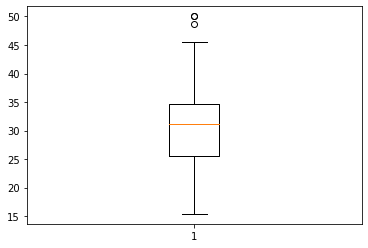

In [24]:
fig1, ax1 = plt.subplots()
ax1.boxplot(merged_df["Data_Value"])

In [51]:
quartiles = merged_df["Data_Value"].quantile([.1,.5,.9])
lowerq = quartiles[0.1]
upperq = quartiles[0.9]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 22.525
The upper quartile is: 38.289772998805226
The interquartile range is: 15.764772998805228
The the median is: 31.074358974358972 


In [56]:
merged_df.loc[(merged_df["Data_Value"]>=38.289772998805226)]

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
7,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,Y,N,N,N,N,N,N,4/3/14 15:43,39.573077
27,1009959,2nd Street Market - Five Rivers MetroPark,http://www.metroparks.org,https://www.facebook.com/2ndStreetMarket/,NaN,NaN,NaN,600 E. 2nd Street,Dayton,Montgomery,...,Y,Y,Y,Y,Y,Y,N,Y,7/26/18 16:26,42.967797
31,1005636,32nd Street/Waverly Farmers Market,http://www.32ndstreetmarket.org,https://www.facebook.com/pages/Baltimores-32nd...,NaN,NaN,NaN,E. 32nd & Barclay Street,Baltimore,Baltimore,...,N,Y,N,N,N,N,N,N,7/26/18 16:47,39.562189
36,1011213,441 Ministries Farm Stand,NaN,NaN,NaN,NaN,NaN,441 Parsells Avenue,Rochester,Monroe,...,N,Y,N,N,N,N,N,N,6/8/15 9:22,38.325926
93,1011214,Aenon Baptist Church Farm Stand,NaN,NaN,NaN,NaN,NaN,175 Genesee Street,Rochester,Monroe,...,N,Y,N,N,N,N,N,N,6/8/15 9:24,38.325926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,1012295,Westgate Farmers' Market @ Elder Beerman,http://www.toledofarmersmarket.com,Toledo Farmers Market,NaN,NaN,NaN,3300 Secor Road,Toledo,Lucas,...,N,Y,N,Y,N,N,N,N,7/7/16 9:47,44.304950
8519,1004922,Westside Farmers Market,http://www.westsidemarketrochester.com,https://www.facebook.com/westsidemarketrochester,https://twitter.com/westsideroch,NaN,NaN,831 Genesee Street,Rochester,Monroe,...,N,Y,N,Y,N,N,N,N,6/27/16 13:41,38.325926
8556,1019392,Whitehaven Kulliye Farmers Market,https://whitehavenkulliye.org/the-suq/,NaN,NaN,NaN,NaN,3379 Millbranch Road,Memphis,Shelby,...,N,Y,Y,Y,N,N,N,Y,2/17/19 10:22,39.291111
8617,1005613,Wilmington Farmers Market,http://www.downtownvisions.org,NaN,NaN,NaN,NaN,N King St. & 11th St.,Wilmington,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,39.573077


In [53]:
meanvalue.loc[(meanvalue["Data_Value"]>=38.289772998805226)].count()

StateDesc     45
CityName      45
Data_Value    45
dtype: int64

In [64]:
c_merged_df= merged_df.drop(columns=["FMID","Website","Facebook","Twitter","Youtube","OtherMedia","street","updateTime",
                                   "Season1Date","Season1Time","Season2Date","Season2Time","Season3Date","Season3Time",
                                    "Season4Date","Season4Time",'Location', 'Credit', 'WIC', 'WICcash'])

In [63]:
c_merged_df.columns

Index(['MarketName', 'CityName', 'county', 'StateDesc', 'zip', 'Season4Date',
       'Season4Time', 'x', 'y', 'Location', 'Credit', 'WIC', 'WICcash',
       'SFMNP', 'SNAP', 'Organic', 'Bakedgoods', 'Cheese', 'Crafts', 'Flowers',
       'Eggs', 'Seafood', 'Herbs', 'Vegetables', 'Honey', 'Jams', 'Maple',
       'Meat', 'Nursery', 'Nuts', 'Plants', 'Poultry', 'Prepared', 'Soap',
       'Trees', 'Wine', 'Coffee', 'Beans', 'Fruits', 'Grains', 'Juices',
       'Mushrooms', 'PetFood', 'Tofu', 'WildHarvested', 'Data_Value'],
      dtype='object')

In [66]:
top = c_merged_df.loc[(c_merged_df["Data_Value"]>=38.289772998805226)]
low = c_merged_df.loc[(c_merged_df["Data_Value"]<=22.525)]

In [102]:
low["Fruits"].value_counts()

Y    121
N     27
Name: Fruits, dtype: int64

In [103]:
top["Fruits"].value_counts()

Y    117
N     28
Name: Fruits, dtype: int64

In [76]:
USDA.loc[(USDA["street"].isnull())]

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43
46,1008391,84 west farmers market (Dothan),NaN,NaN,NaN,NaN,NaN,NaN,Dothan,Houston,...,N,N,Y,N,N,N,N,N,N,3/15/14 9:29
69,1002108,Acadia Farmers' Market in Town Hill,NaN,www.Facebook.com/AcadiaFarmersMarket,NaN,NaN,NaN,NaN,Town Hill,Hancock,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
233,1018356,Appleton Area Farmers Market,NaN,NaN,NaN,NaN,NaN,NaN,Appleton,Swift,...,N,N,Y,N,N,N,N,N,N,6/22/17 17:03
365,1001695,Ausable Valley Farmers Market,NaN,https://www.facebook.com/pages/Ausable-Valley-...,NaN,NaN,NaN,NaN,Ausable Forks,Essex,...,N,N,N,N,N,N,N,N,N,4/18/11 20:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,1000416,Yarker at Beach Gardens,NaN,NaN,NaN,NaN,NaN,NaN,Beach,Golden Valley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
8772,1003519,Yemassee Farmers Market,NaN,NaN,NaN,NaN,NaN,NaN,Yemassee,Hampton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
8774,1001790,Yesterday's Farmers-Kustom Gardens,NaN,NaN,NaN,NaN,NaN,NaN,Bowman,Adams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
8777,2000036,YMCA Farmers Market and Veggie Van,http://mi.marketmaker.uiuc.edu/business/162766...,https://www.facebook.com/pages/YMCA-Farmers-Ma...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013


In [79]:
group_low = low.groupby("CityName")
group_low["Organic"].value_counts()

CityName       Organic
Alameda        Y          1
Arvada         -          2
               N          1
Bellevue       Y          2
Berkeley       Y          3
                         ..
Thousand Oaks  Y          1
Torrance       Y          1
Tustin         Y          1
Union City     Y          2
West Covina    Y          1
Name: Organic, Length: 67, dtype: int64

In [142]:
group_low = low.set_index("CityName").groupby("CityName")

<Figure size 1280x720 with 0 Axes>

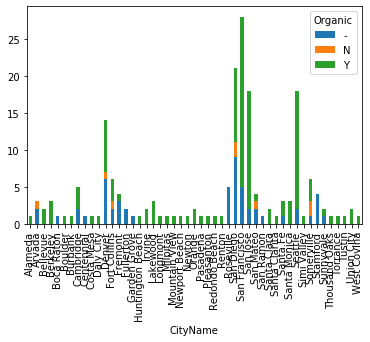

In [147]:
plt.figure(figsize=(16,9), dpi= 80)
group_low["Organic"].value_counts().unstack().plot.bar(stacked=True)
plt.title("Organic in Farmer Market of 10% of low obeisity value city")
plt.show()

<Figure size 1280x720 with 0 Axes>

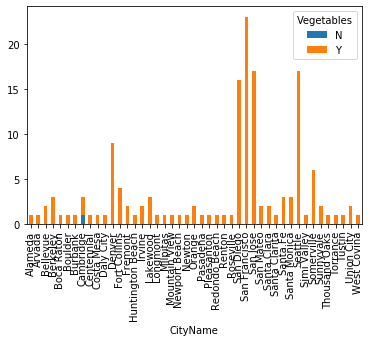

In [157]:
plt.figure(figsize=(16,9), dpi= 80)
group_low["Vegetables"].value_counts().unstack().plot.bar(stacked=True)
plt.title("Vegetables in Farmer Market of 10% of low obeisity value city")
plt.show()

In [189]:
from config.py import gkey
gmaps.configure(api_key=gkey)

In [204]:
C_low = pd.DataFrame(low.groupby(["CityName","StateDesc"]).size())

In [205]:
C_low = C_low.reset_index()
C_low["lat"]=""
C_low["lng"]=""

In [213]:
C_low = C_low.rename(columns={0:"total"})

In [206]:
for index, row in C_low.iterrows():
    target_city = row["CityName"]+","+row["StateDesc"]
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(target_city, gkey)
    geo_data = requests.get(target_url).json()
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    C_low.loc[index,"lat"]= lat
    C_low.loc[index,"lng"]= lng

In [215]:
locations = C_low[["lat", "lng"]]

# Fill NaN values and convert to float
rating = C_low["total"].astype(float)

In [216]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [217]:
C_top = pd.DataFrame(top.groupby(["CityName","StateDesc"]).size())
C_top = C_top.reset_index()
C_top["lat"]=""
C_top["lng"]=""
C_top = C_top.rename(columns={0:"total"})

,CityName,StateDesc,total,lat,lng
0,Albany,Georgia,1,,
1,Allentown,Pennsylvania,4,,
2,Augusta,Georgia,2,,
3,Baltimore,Maryland,25,,
4,Birmingham,Alabama,7,,
5,Brownsville,Texas,1,,
6,Camden,New Jersey,4,,
7,Canton,Ohio,5,,
8,Charleston,West Virginia,1,,
9,Cleveland,Ohio,14,,


In [218]:
for index, row in C_top.iterrows():
    target_city = row["CityName"]+","+row["StateDesc"]
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(target_city, gkey)
    geo_data = requests.get(target_url).json()
    lat = geo_data["results"][0]["geometry"]["location"]["lat"]
    lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    C_top.loc[index,"lat"]= lat
    C_top.loc[index,"lng"]= lng

In [219]:
locations = C_top[["lat", "lng"]]

# Fill NaN values and convert to float
rating = C_top["total"].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))